# Barcelona Open Data Analysis

The following analysis is based on openly available data, collected from https://www.kaggle.com/xvivancos/barcelona-data-sets/home and published by the city.

This initial data exploration will focus on the demography of the city. Being an immigrant myself, I will focus on the migration flows.

## Data Exploration

In [35]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
immigrants_nationality = pd.read_csv("input/immigrants_by_nationality.csv")

In [11]:
immigrants_nationality.shape

(35224, 7)

In [31]:
immigrants_nationality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35224 entries, 0 to 35223
Data columns (total 7 columns):
Year                 35224 non-null int64
District Code        35224 non-null int64
District Name        35224 non-null object
Neighborhood Code    35224 non-null int64
Neighborhood Name    35224 non-null object
Nationality          35224 non-null object
Number               35224 non-null int64
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [26]:
immigrants_nationality.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Nationality,Number
0,2017,1,Ciutat Vella,1,el Raval,Spain,1109
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Spain,482
2,2017,1,Ciutat Vella,3,la Barceloneta,Spain,414
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,2017,2,Eixample,5,el Fort Pienc,Spain,663


In [32]:
immigrants_nationality.describe()

,Year,District Code,Neighborhood Code,Number
count,35224.000000,35224.000000,35224.000000,35224.000000
mean,2016.010504,7.500000,37.837838,7.707273
std,0.810846,11.061717,22.119174,50.421883
min,2015.000000,1.000000,1.000000,0.000000
25%,2015.000000,4.000000,19.000000,0.000000
50%,2016.000000,7.000000,37.500000,0.000000
75%,2017.000000,8.000000,56.000000,2.000000
max,2017.000000,99.000000,99.000000,1603.000000


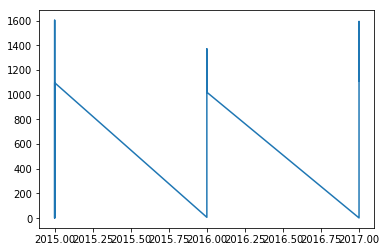

In [39]:
plt.plot('Year', 'Number', data=immigrants_nationality[immigrants_nationality.Nationality == "Spain"])

In [40]:
immigrants_nationality[immigrants_nationality.Nationality == "Spain"]

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Nationality,Number
0,2017,1,Ciutat Vella,1,el Raval,Spain,1109
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Spain,482
2,2017,1,Ciutat Vella,3,la Barceloneta,Spain,414
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,2017,2,Eixample,5,el Fort Pienc,Spain,663
5,2017,2,Eixample,6,la Sagrada Família,Spain,1181
6,2017,2,Eixample,7,la Dreta de l'Eixample,Spain,1063
7,2017,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Spain,1177
8,2017,2,Eixample,9,la Nova Esquerra de l'Eixample,Spain,1593
9,2017,2,Eixample,10,Sant Antoni,Spain,883
